# MATH 210 Introduction to Mathematical Computing

**March 19, 2025**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Euler's Method for Systems

Write a function called `odeEulerSystem` which takes `f`, `t`, `U0` and return the matrix `U` of size `len(t)` by `len(U0)` where `U[n,:]` is the approximation of $\mathbf{u}(t)$ at time $t_n$.

In [8]:
def odeEulerSystem(f,t,U0):
    U = np.zeros([len(t),len(U0)])
    U[0,:] = U0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        U[n+1,:] = U[n,:] + f(t[n],U[n,:])*h
    return U

Consider a simple first order 2D system of equations:

$$
\begin{align*}
x' &= -x \\
y' &= y
\end{align*}
$$

with $x(0) = y(0) = 1$. We know the exact solution is $x(t) = e^{-t}$ and $y(t) = e^t$.

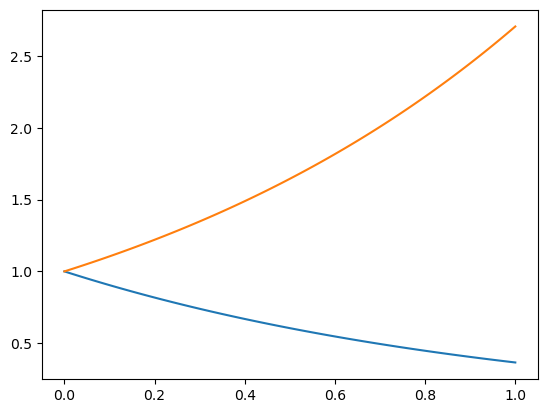

In [9]:
# u[0] = x, u[1] = y
f = lambda t,u: np.array([-u[0],u[1]])
t = np.linspace(0,1,101)
U0 = [1,1]

U = odeEulerSystem(f,t,U0)
# Plot Euler approximatino of x(t)
plt.plot(t,U[:,0])
# Plot Euler approximatino of y(t)
plt.plot(t,U[:,1])
plt.show()

The function `spi.odeint` works in a similar way. **Warning!** The function `odeint` expects `f` to have first `u` then `t`.

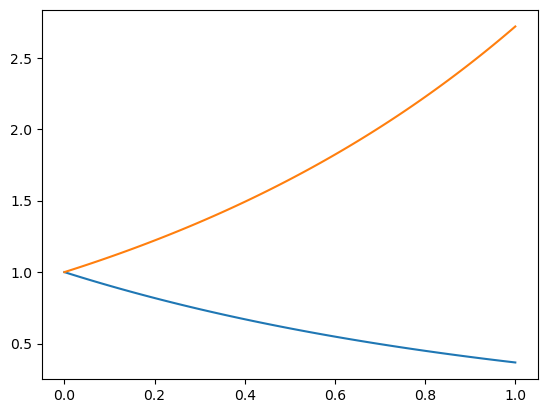

In [10]:
# u[0] = x, u[1] = y
f = lambda u,t: np.array([-u[0],u[1]])
t = np.linspace(0,1,101)
U0 = [1,1]

U = spi.odeint(f,U0,t)
# Plot odeint approximation of x(t)
plt.plot(t,U[:,0])
# Plot odeint approximation of y(t)
plt.plot(t,U[:,1])
plt.show()

## Example: 2D Mass Spring System

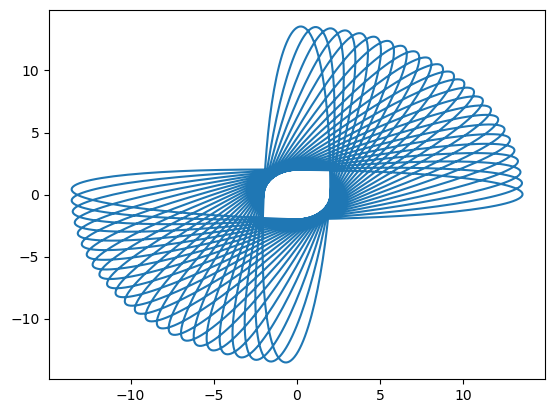

In [24]:
m = 1; L = 1; k = 0.1;

def f(u,t):
    D = np.sqrt(u[0]**2 + u[2]**2)
    du0 = u[1]
    du1 = (L/D - 1)*k*u[0]/m
    du2 = u[3]
    du3 = (L/D - 1)*k*u[2]/m
    return np.array([du0,du1,du2,du3])

U0 = [2,0,0,4]
t = np.linspace(0,500,3000)
U = spi.odeint(f,U0,t)

plt.plot(U[:,0],U[:,2])
plt.show()